# Mansi Upadhyay - Smoking anlaysis using chi- sqaure test



### Importing the data

In [ ]:
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")


from scipy.stats import chi2,chi2_contingency

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
#Reading the csv
data_path='../input/smoking-dataset-from-uk/smoking.csv'
df=pd.read_csv(data_path)
smoking=df.copy()

In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
# inspect data, print top 5
smoking.head(5)

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
# bottom 5 rows:
smoking.tail(5)

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
1686,1687,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,NaN,NaN,NaN
1687,1688,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Hand-Rolled
1688,1689,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,NaN,NaN,NaN
1689,1690,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Packets
1690,1691,Male,31,Married,Degree,Scottish,White,"10,400 to 15,600",Scotland,No,NaN,NaN,NaN


### EDA


In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
#get the size of dataframe
print ("Rows     : " , smoking.shape[0])
print ("Columns  : " , smoking.shape[1])
print ("\nFeatures : \n", smoking.columns.tolist())
print ("\nMissing values :  ", smoking.isnull().sum().values.sum())
print ("\nUnique values :  \n", smoking.nunique())

Rows     :  1691
Columns  :  13

Features : 
 ['Unnamed: 0', 'gender', 'age', 'marital_status', 'highest_qualification', 'nationality', 'ethnicity', 'gross_income', 'region', 'smoke', 'amt_weekends', 'amt_weekdays', 'type']

Missing values :   3810

Unique values :  
 Unnamed: 0               1691
gender                      2
age                        79
marital_status              5
highest_qualification       8
nationality                 8
ethnicity                   7
gross_income               10
region                      7
smoke                       2
amt_weekends               24
amt_weekdays               24
type                        4
dtype: int64


In [ ]:
smoking=smoking.drop('Unnamed: 0',axis=1)

In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   object 
 1   age                    1691 non-null   int64  
 2   marital_status         1691 non-null   object 
 3   highest_qualification  1691 non-null   object 
 4   nationality            1691 non-null   object 
 5   ethnicity              1691 non-null   object 
 6   gross_income           1691 non-null   object 
 7   region                 1691 non-null   object 
 8   smoke                  1691 non-null   object 
 9   amt_weekends           421 non-null    float64
 10  amt_weekdays           421 non-null    float64
 11  type                   421 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 158.7+ KB


Types of variables

* Categorical varibles - 'gender', 'marital_status', 'highest_qualification','nationality', 'ethnicity', 'gross_income', 'region', 'smoke','type'
* Quantitative variables -'age','amt_weekends','amt_weekdays'

There are 421 missing values in 'amt_weekends', 'amt_weekdays' and 'type'.

In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
#changing object dtype to category  to save memory
smoking.gender=smoking['gender'].astype("category")
smoking.marital_status=smoking['marital_status'].astype("category")
smoking.highest_qualification=smoking['highest_qualification'].astype("category")
smoking.nationality=smoking['nationality'].astype("category")
smoking.ethnicity=smoking['ethnicity'].astype("category")
smoking.gross_income=smoking['gross_income'].astype("category")
smoking.region=smoking['region'].astype("category")
smoking.smoke=smoking['smoke'].astype("category")
smoking.type=smoking['type'].astype("category")

In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
smoking.describe()

,age,amt_weekends,amt_weekdays
count,1691.000000,421.000000,421.000000
mean,49.836192,16.410926,13.750594
std,18.736851,9.892988,9.388292
min,16.000000,0.000000,0.000000
25%,34.000000,10.000000,7.000000
50%,48.000000,15.000000,12.000000
75%,65.500000,20.000000,20.000000
max,97.000000,60.000000,55.000000


In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
smoking.describe(include='category')

,gender,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,type
count,1691,1691,1691,1691,1691,1691,1691,1691,421
unique,2,5,8,8,7,10,7,2,4
top,Female,Married,No Qualification,English,White,"5,200 to 10,400",Midlands & East Anglia,No,Packets
freq,965,812,586,833,1560,396,443,1270,297


In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
list_col=  smoking.select_dtypes(['category']).columns
for i in range(len(list_col)):
    print(smoking[list_col[i]].value_counts())

Female    965
Male      726
Name: gender, dtype: int64
Married      812
Single       427
Widowed      223
Divorced     161
Separated     68
Name: marital_status, dtype: int64
No Qualification     586
GCSE/O Level         308
Degree               262
Other/Sub Degree     127
Higher/Sub Degree    125
A Levels             105
GCSE/CSE             102
ONC/BTEC              76
Name: highest_qualification, dtype: int64
English     833
British     538
Scottish    142
Other        71
Welsh        66
Irish        23
Refused      17
Unknown       1
Name: nationality, dtype: int64
White      1560
Asian        41
Black        34
Chinese      27
Mixed        14
Refused      13
Unknown       2
Name: ethnicity, dtype: int64
5,200 to 10,400     396
10,400 to 15,600    268
2,600 to 5,200      257
15,600 to 20,800    188
20,800 to 28,600    155
Under 2,600         133
Refused             108
Above 36,400         89
28,600 to 36,400     79
Unknown              18
Name: gross_income, dtype: int64
Midlands

In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable
 #to check spread, central tendency , dispersion and outliers
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

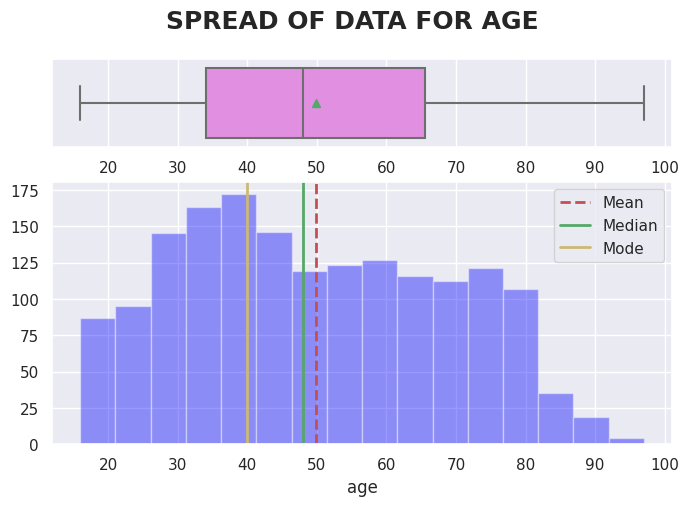

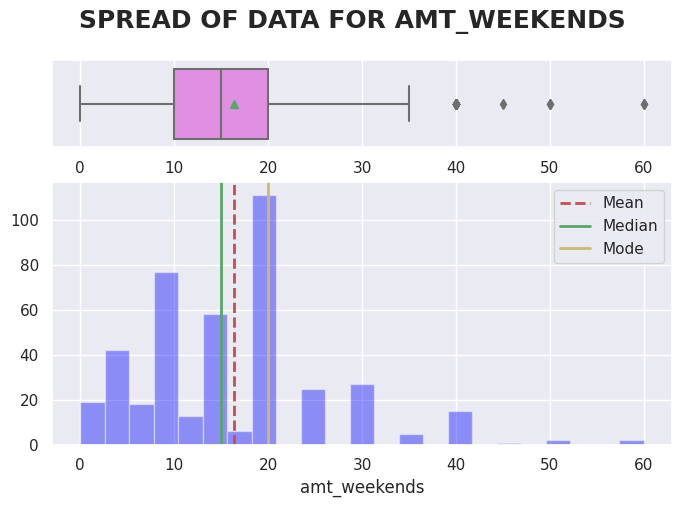

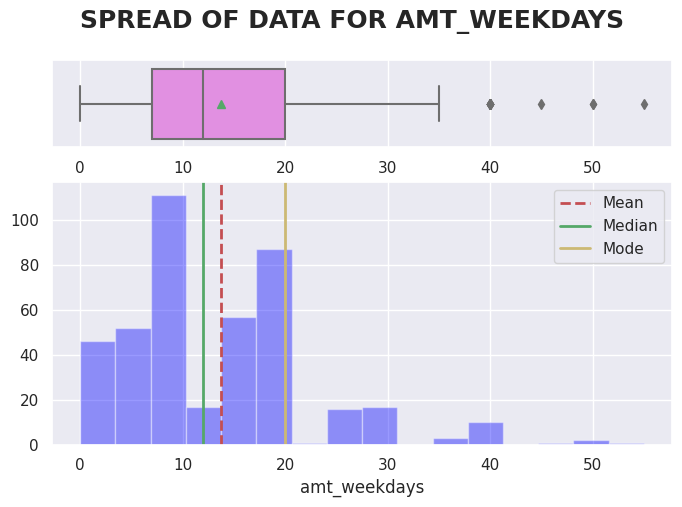

In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
#select all quantitative columns for checking the spread
list_col=  smoking.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(smoking[list_col[i]])

In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

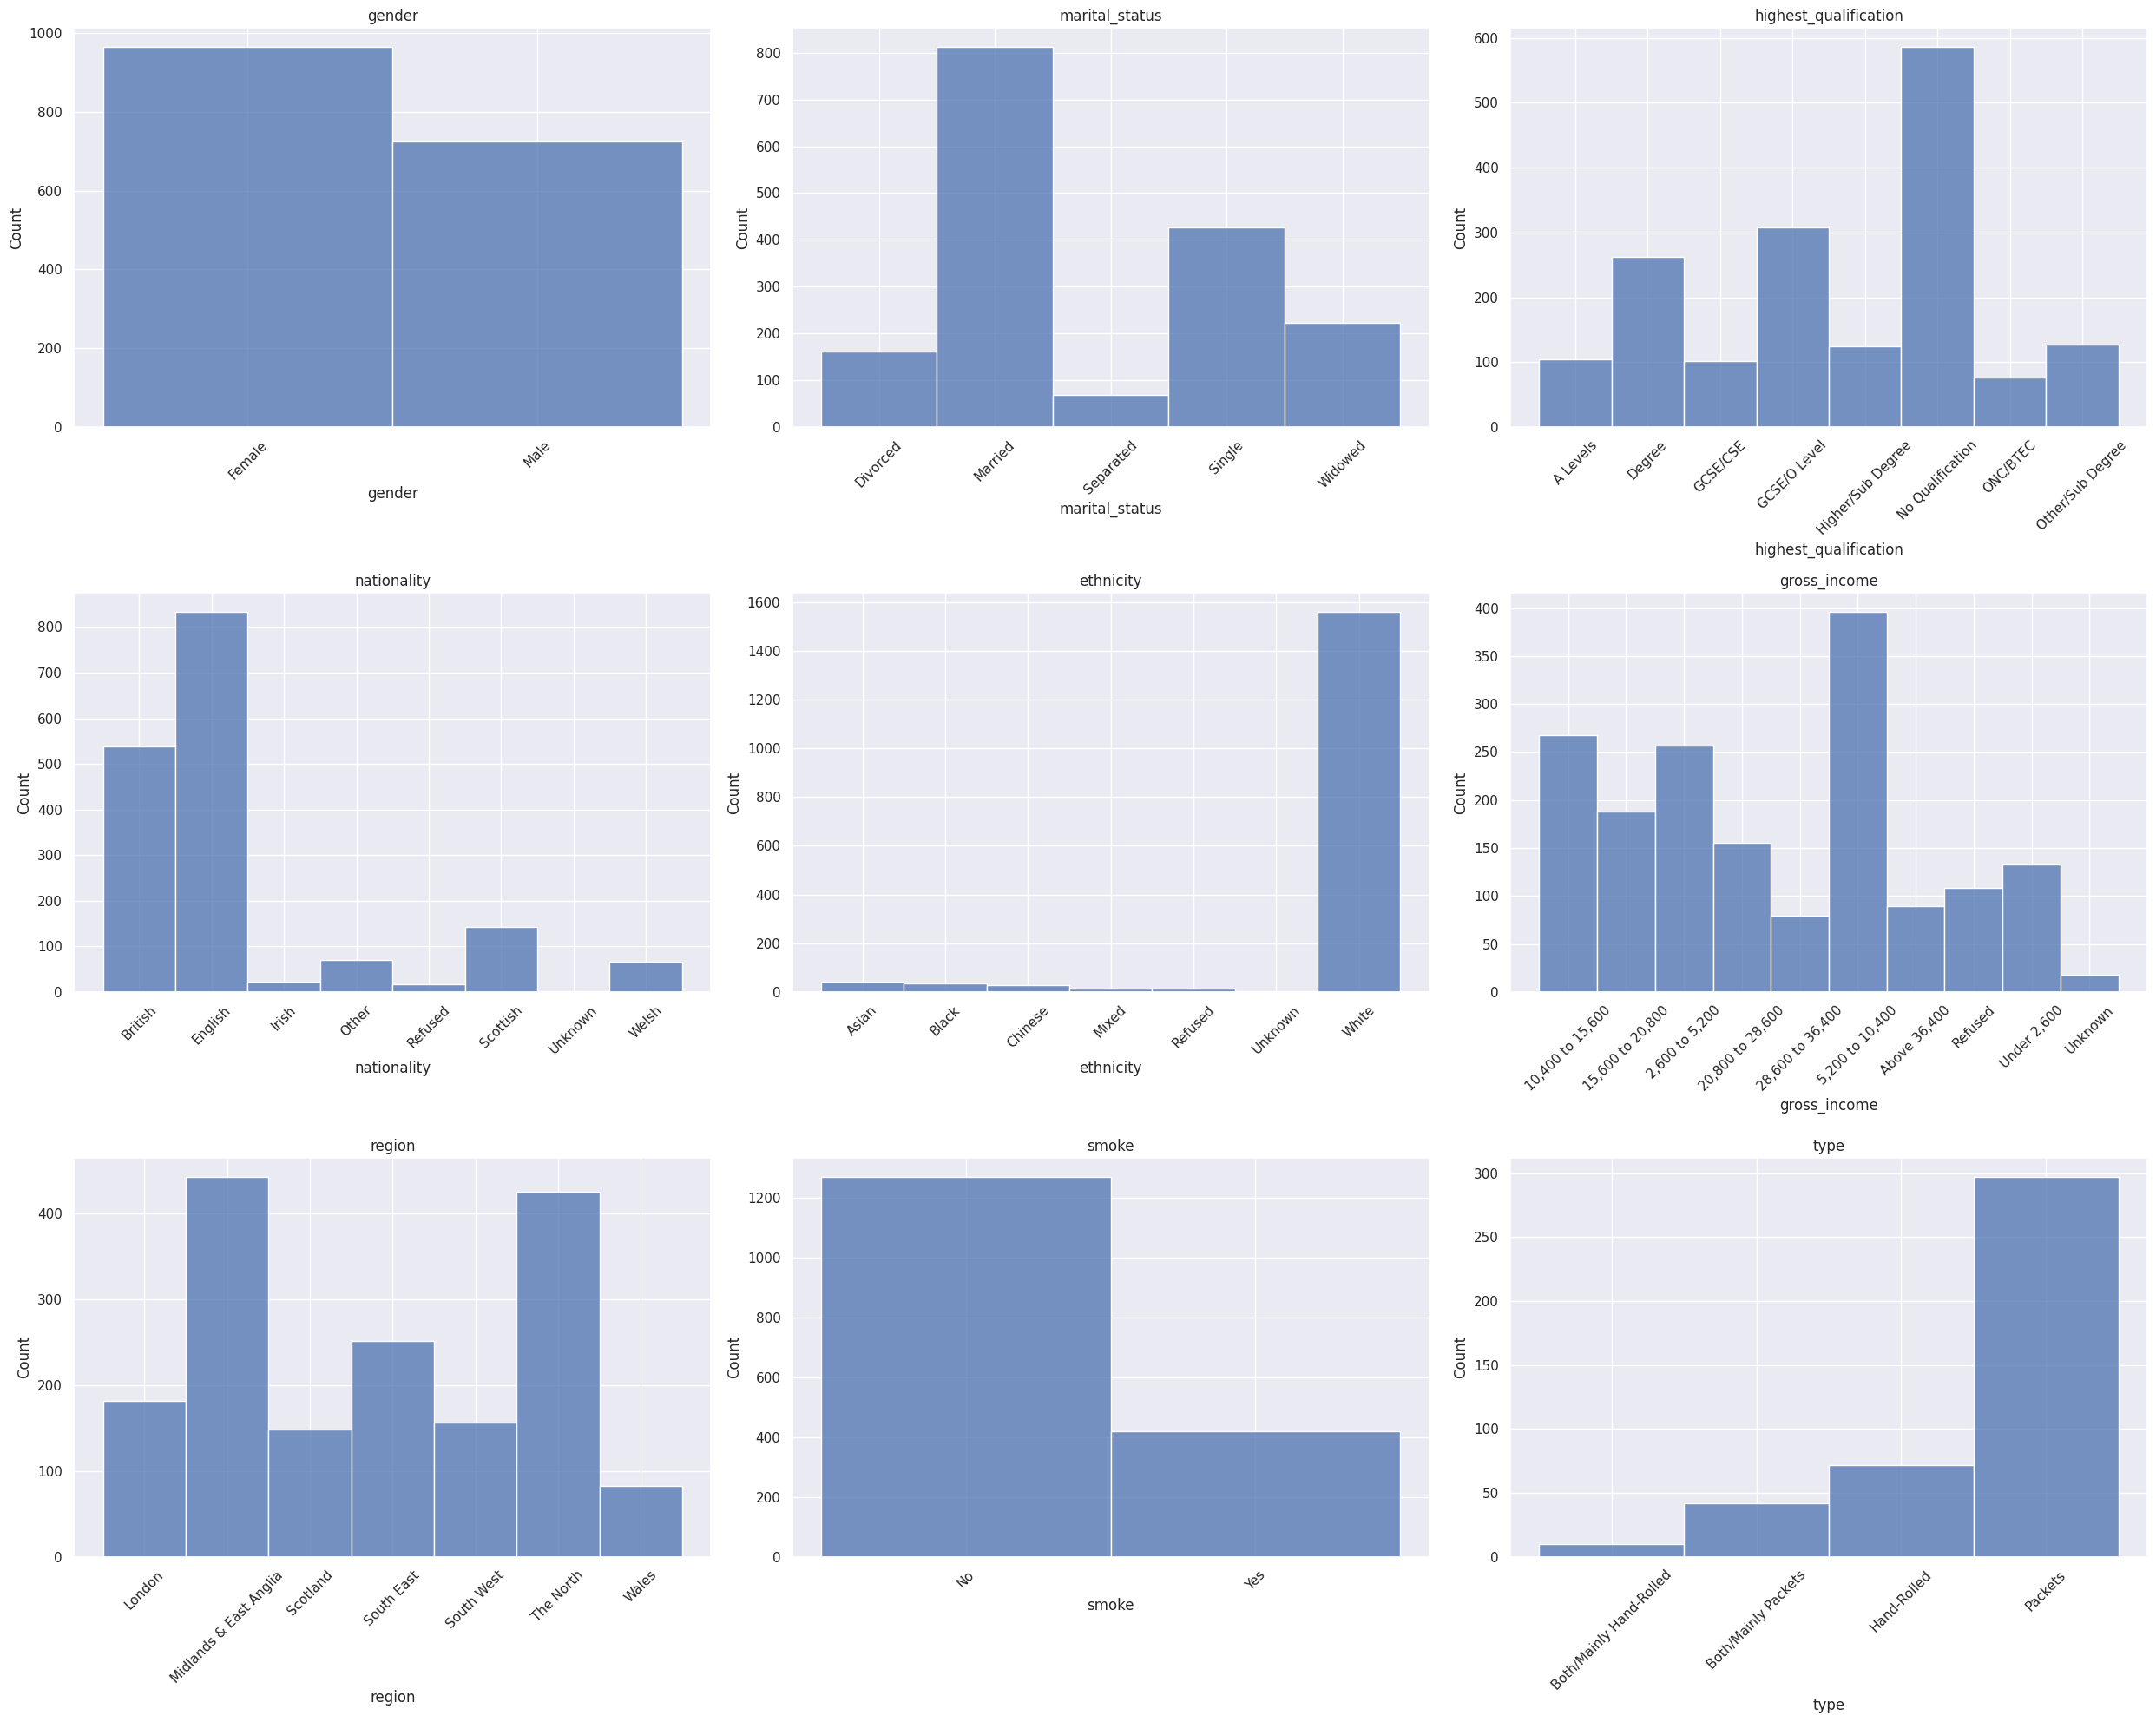

In [ ]:
list_col=  ['gender', 'marital_status', 'highest_qualification','nationality', 'ethnicity', 'gross_income', 'region', 'smoke','type']
plt.figure(figsize=(25, 20))
for i in range(len(list_col)):
    plt.subplot(3,3,i+1)
    plt.title(list_col[i])
    sns.histplot(data=smoking,x=smoking[list_col[i]])
    sns.set(font_scale=1)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

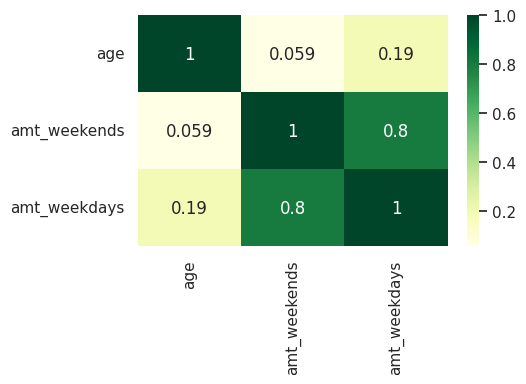

In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
plt.figure(figsize=(5,3))
sns.heatmap(smoking.corr(),annot=True ,cmap="YlGn" )
plt.show()

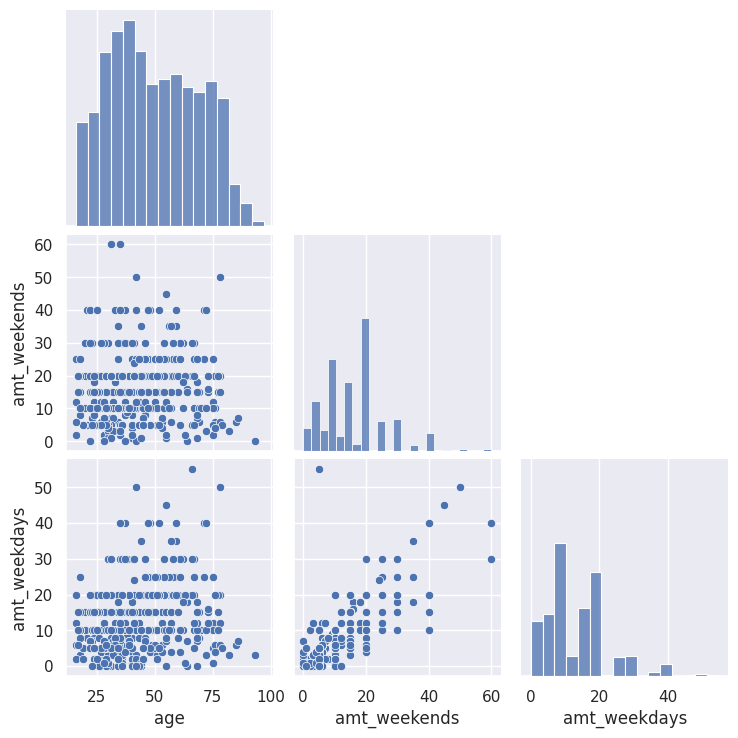

In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
sns.pairplot(data=smoking , corner=True)
plt.show()

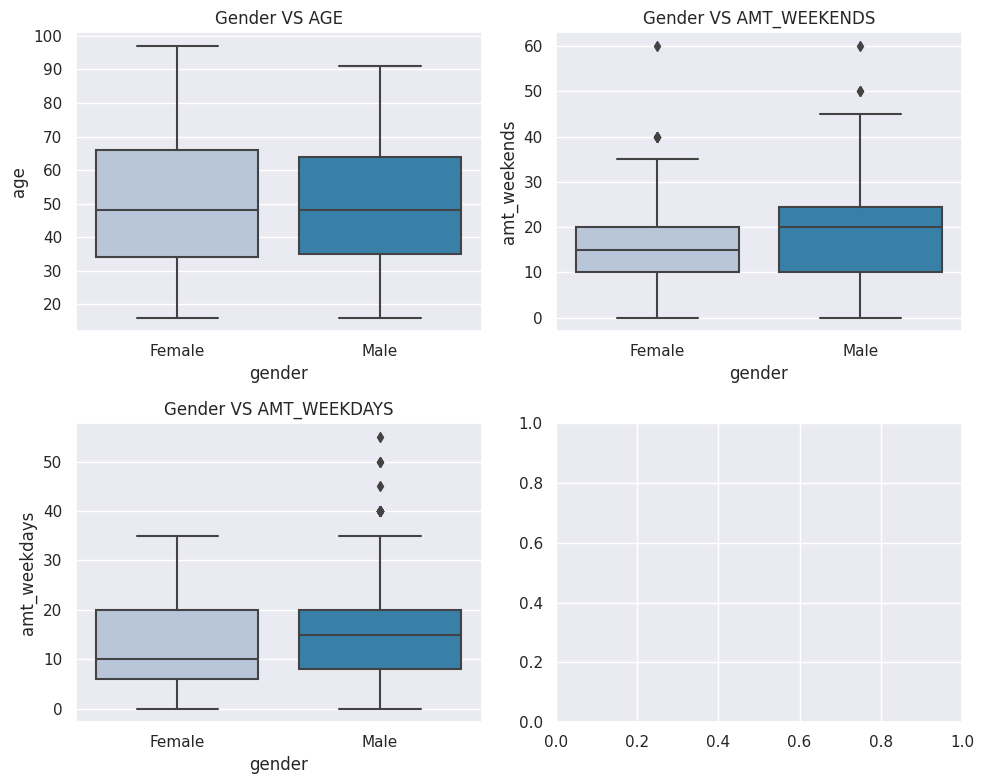

In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
#Gender vs all numerical variable
fig1, axes1 =plt.subplots(2,2,figsize=(10, 8))
#select all quantitative columns for checking the spread
list_col=  smoking.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=smoking[list_col[i]],x=smoking['gender'],ax=ax,palette="PuBu", orient='v').set(title='Gender VS '+ list_col[i].upper())

plt.tight_layout()
plt.show()

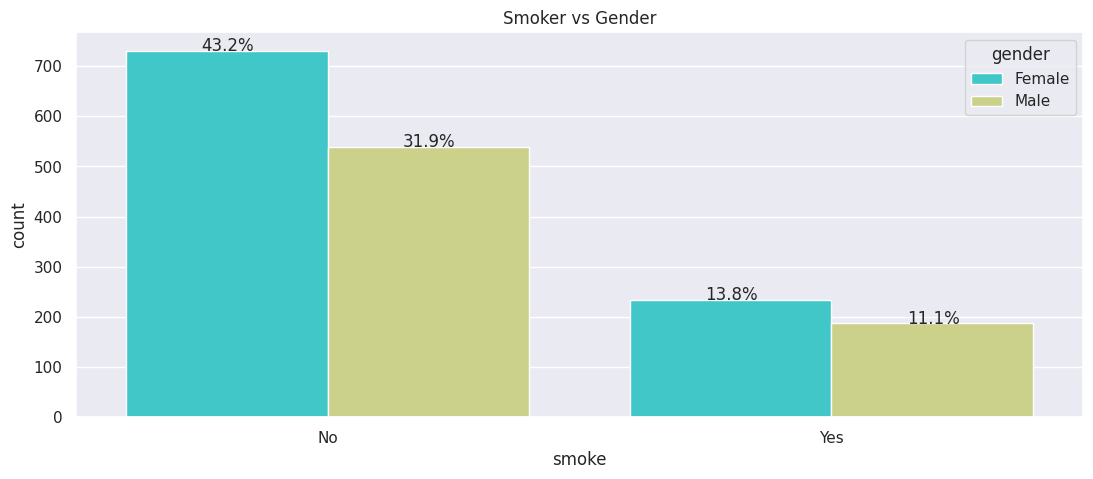

In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
#smoker vs Sex
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoke',hue='gender',data=smoking,palette='rainbow')
bar_perc(ax,smoking['gender'])
ax.set(title="Smoker vs Gender");

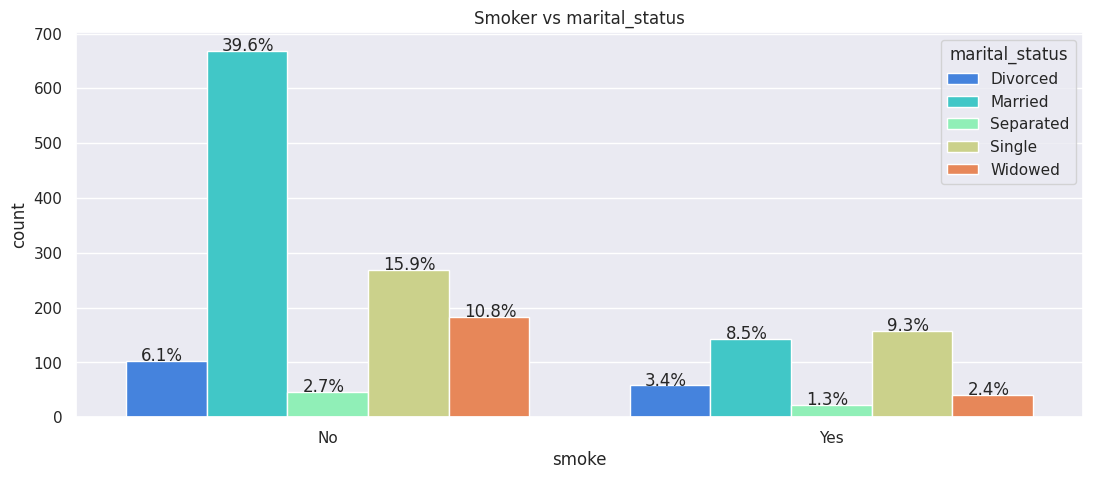

In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
#smoker vs marital_status
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoke',hue='marital_status',data=smoking,palette='rainbow')
bar_perc(ax,smoking['marital_status'])
ax.set(title="Smoker vs marital_status");

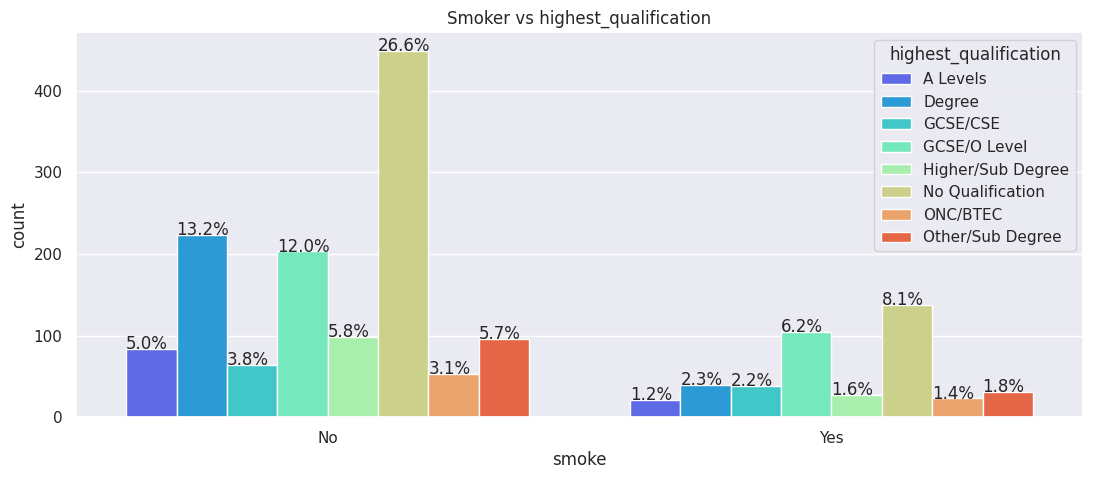

In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
#smoker vs highest_qualification
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoke',hue='highest_qualification',data=smoking,palette='rainbow')
bar_perc(ax,smoking['highest_qualification'])
ax.set(title="Smoker vs highest_qualification");

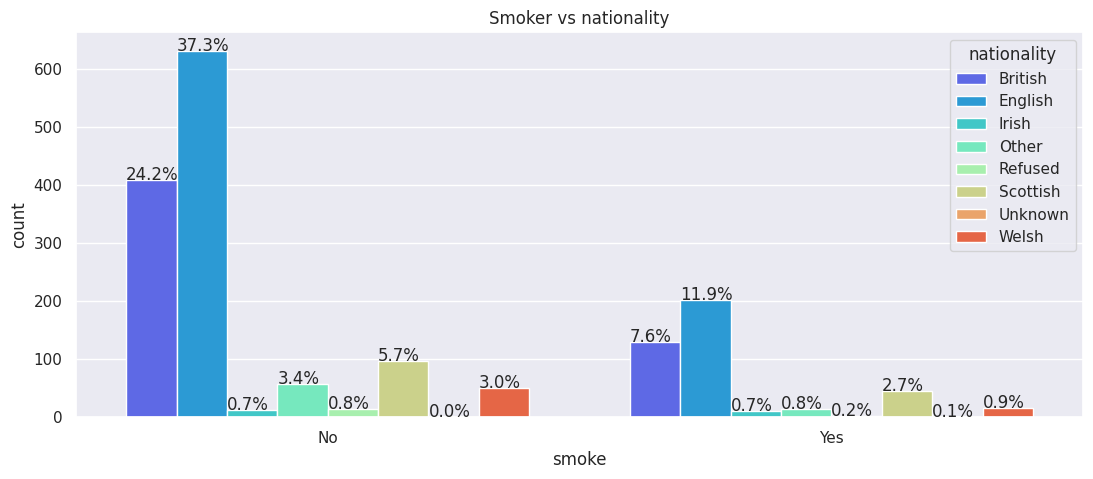

In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
#smoker vs nationality
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoke',hue='nationality',data=smoking,palette='rainbow')
bar_perc(ax,smoking['nationality'])
ax.set(title="Smoker vs nationality");

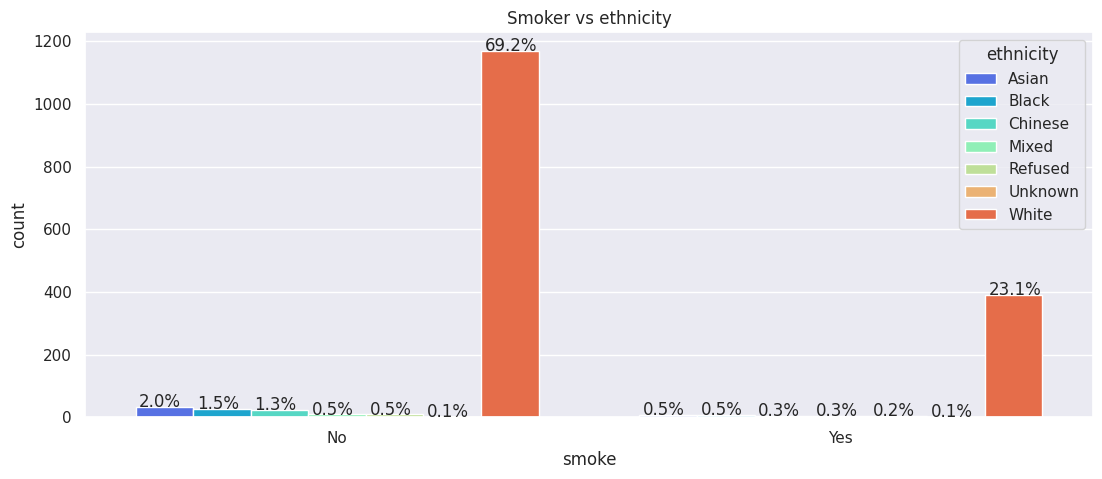

In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
#smoker vs ethnicity
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoke',hue='ethnicity',data=smoking,palette='rainbow')
bar_perc(ax,smoking['ethnicity'])
ax.set(title="Smoker vs ethnicity");

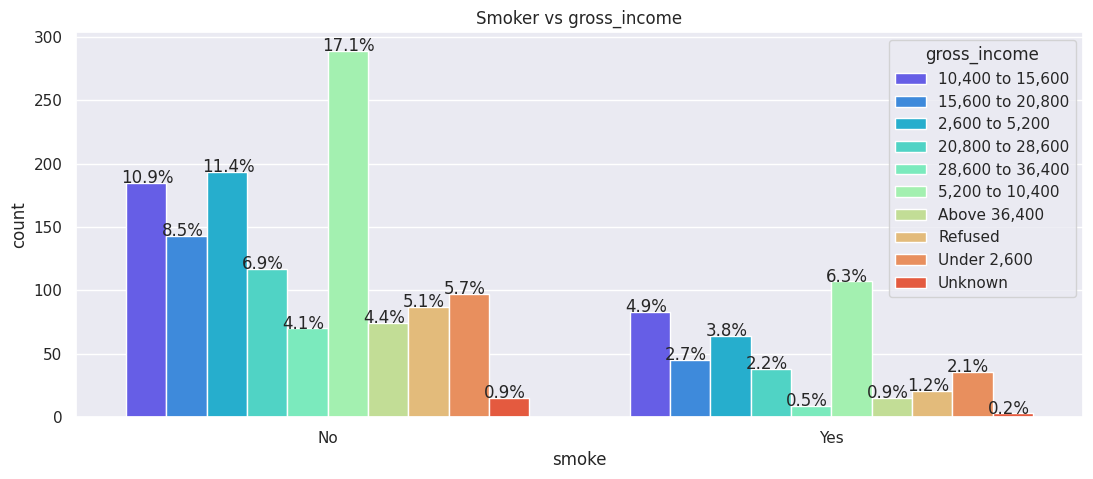

In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
#smoker vs gross_income
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoke',hue='gross_income',data=smoking,palette='rainbow')
bar_perc(ax,smoking['gross_income'])
ax.set(title="Smoker vs gross_income");

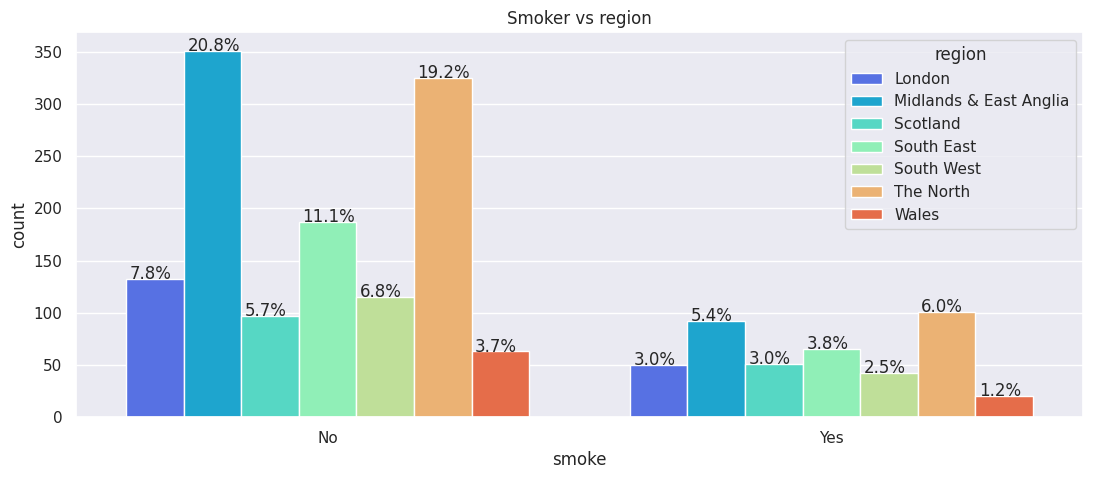

In [ ]:
#code by "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
#smoker vs region
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoke',hue='region',data=smoking,palette='rainbow')
bar_perc(ax,smoking['region'])
ax.set(title="Smoker vs region");

### Chi-Square Test



### 1. Prove (or disprove) that there is no difference in smoking between female and male.


Step 1: Define null and alternative hypothesis
* H0:𝜇1=𝜇2 There are not any difference in smoking between Female and Male
* H1:μ1<μ2 or 𝜇1>𝜇2 There are any difference in smoking between Female and Male

Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.
α = 0.05

Step 3: Identify gender is norminal varialble. So The Chi-Squre test is one of the good options to prove. The Chi-Square test is a statistical procedure for determining the difference between observed and expected data. This test can also be used to determine whether it correlates to the categorical variables in our data. It helps to find out whether a difference between two categorical variables is due to chance or a relationship between them.

In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#Contingency Table
contingency_table=pd.crosstab(smoking["gender"],smoking["smoke"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 smoke    No  Yes
gender          
Female  731  234
Male    539  187


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#Observed Values
Observed_Values = contingency_table.values
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[731 234]
 [539 187]]


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[724.74866943 240.25133057]
 [545.25133057 180.74866943]]


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)

Degree of Freedom:- 1


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#Significance Level 5%
alpha=0.05

In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.5044591484173093


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)

p-value: 0.4775473364084263


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.5044591484173093
critical_value: 3.841458820694124
p-value: 0.4775473364084263


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("Reject H0,there are not any difference in smoking between Female and Male")
else:
    print("Retain H0,there are not any difference in smoking between Female and Male")

if p_value<=alpha:
    print("Reject H0,there are not any difference in smoking between Female and Male")
else:
    print("Retain H0,there are not any difference in smoking between Female and Male")

Retain H0,there are not any difference in smoking between Female and Male
Retain H0,there are not any difference in smoking between Female and Male


### 2. Prove (or refute) that there are no differences in income between smokers and nonsmokers.


Step 1: Define null and alternative hypothesis
* H0:𝜇1=𝜇2 There are not any difference in income between smoker and non-smoker
* H1:μ1<μ2 or 𝜇1>𝜇2 There are any difference in income between smoker and non-smoker

Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.
α = 0.05

Step 3: Identify income is ordinal varialbles. So The Chi-Squre test is one of the good options to prove. The Chi-Square test is a statistical procedure for determining the difference between observed and expected data. This test can also be used to determine whether it correlates to the categorical variables in our data. It helps to find out whether a difference between two categorical variables is due to chance or a relationship between them.

In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#Contingency Table
contingency_table=pd.crosstab(smoking["gross_income"],smoking["smoke"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 smoke              No  Yes
gross_income              
10,400 to 15,600  185   83
15,600 to 20,800  143   45
2,600 to 5,200    193   64
20,800 to 28,600  117   38
28,600 to 36,400   70    9
5,200 to 10,400   289  107
Above 36,400       74   15
Refused            87   21
Under 2,600        97   36
Unknown            15    3


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#Observed Values
Observed_Values = contingency_table.values
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[185  83]
 [143  45]
 [193  64]
 [117  38]
 [ 70   9]
 [289 107]
 [ 74  15]
 [ 87  21]
 [ 97  36]
 [ 15   3]]


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[201.27735068  66.72264932]
 [141.19455943  46.80544057]
 [193.01596688  63.98403312]
 [116.41040804  38.58959196]
 [ 59.33175636  19.66824364]
 [297.40981668  98.59018332]
 [ 66.84210526  22.15789474]
 [ 81.11176818  26.88823182]
 [ 99.88764045  33.11235955]
 [ 13.51862803   4.48137197]]


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:11,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)

Degree of Freedom:- 9


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#Significance Level 5%
alpha=0.05

In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 19.835003487043213


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)

critical_value: 16.918977604620448


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)

p-value: 0.018958411214945903


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  9
chi-square statistic: 19.835003487043213
critical_value: 16.918977604620448
p-value: 0.018958411214945903


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("Reject H0,there are not any difference in income between smoker and non-smoker")
else:
    print("Retain H0,there are not any difference in income between smoker and non-smoker")

if p_value<=alpha:
    print("Reject H0,there are not any difference in income between smoker and non-smoker")
else:
    print("Retain H0,there are not any difference in income between smoker and non-smoker")

Reject H0,there are not any difference in income between smoker and non-smoker
Reject H0,there are not any difference in income between smoker and non-smoker


### 3.Prove or disprove that there is no difference in highest qualification between smokers and nonsmokers.

Step 1: Define null and alternative hypothesis
* H0:𝜇1=𝜇2 There are not any difference in highest_qualification between smoker and non-smoker
* H1:μ1<μ2 or 𝜇1>𝜇2 There are any difference in highest_qualification between smoker and non-smoker

Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.
α = 0.05

Step 3: Identify highest_qualification is ordinal varialble. So The Chi-Squre test is one of the good options to prove. The Chi-Square test is a statistical procedure for determining the difference between observed and expected data. This test can also be used to determine whether it correlates to the categorical variables in our data. It helps to find out whether a difference between two categorical variables is due to chance or a relationship between them.

In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#Contingency Table
contingency_table=pd.crosstab(smoking["highest_qualification"],smoking["smoke"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 smoke                   No  Yes
highest_qualification          
A Levels                84   21
Degree                 223   39
GCSE/CSE                64   38
GCSE/O Level           203  105
Higher/Sub Degree       98   27
No Qualification       449  137
ONC/BTEC                53   23
Other/Sub Degree        96   31


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#Observed Values
Observed_Values = contingency_table.values
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[ 84  21]
 [223  39]
 [ 64  38]
 [203 105]
 [ 98  27]
 [449 137]
 [ 53  23]
 [ 96  31]]


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[ 78.85866351  26.14133649]
 [196.77114134  65.22885866]
 [ 76.60555884  25.39444116]
 [231.3187463   76.6812537 ]
 [ 93.87936132  31.12063868]
 [440.10644589 145.89355411]
 [ 57.07865169  18.92134831]
 [ 95.38143111  31.61856889]]


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:9,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)

Degree of Freedom:- 7


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#Significance Level 5%
alpha=0.05

In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 40.28107640853026


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)

critical_value: 14.067140449340169


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)

p-value: 1.1120783601770157e-06


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  7
chi-square statistic: 40.28107640853026
critical_value: 14.067140449340169
p-value: 1.1120783601770157e-06


In [ ]:
#code by "Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)
#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("Reject H0,there are not any difference in highest_qualification between smoker and non-smoker")
else:
    print("Retain H0,there are not any difference in highest_qualification between smoker and non-smoker")

if p_value<=alpha:
    print("Reject H0,there are not any difference in highest_qualification between smoker and non-smoker")
else:
    print("Retain H0,there are not any difference in highest_qualification between smoker and non-smoker")

Reject H0,there are not any difference in highest_qualification between smoker and non-smoker
Reject H0,there are not any difference in highest_qualification between smoker and non-smoker


**Thank you!**

reference:
* "What is a Chi-Square Test? Formula, Examples & Application" by Avijeet Biswa (https://www.simplilearn.com/tutorials/statistics-tutorial/chi-square-test)
* "Insurance claims- EDA &Hypothesis Testing" by YOGITA DARADE ('https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing')
* Chi-Square Test of Independence" by KULDEEP(https://www.kaggle.com/code/kuldeepnpatel/chi-square-test-of-independence)